# Neural Network with TensorFlow - regression problem (extended)


# Lets perform the Prediction on the diabetes progression from 10 features 

* (the same problem could be a classification problem if the diabetes values were descrete)

https://medium.com/analytics-vidhya/introduction-to-linear-regression-sklearn-diabetes-dataset-f63378b0a1ee

#### Load the data

In [36]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [37]:
# Save the input and target variables
print(data['DESCR'])
X_data=data['data']
y_data=data['target']
print(dir(data))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [38]:
y_data[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [39]:
X_data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

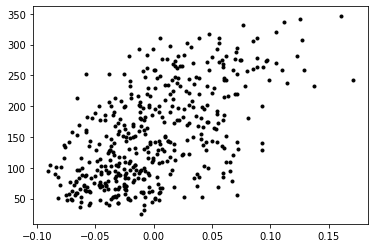

In [40]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(X_data[:,2],y_data[:],'.k')

In [41]:
# Normalise the target data (this will make clearer training curves)
#X_data=(X_data-X_data.mean())/(X_data.std())
#y_data=(y_data-y_data.mean())/(y_data.std())

In [42]:
X_data[0:5,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485]])

In [43]:
y_data[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [44]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_data,y_data,test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(397, 10)
(45, 10)


In [45]:
print(X_train[0].shape)
print(X_test.shape)

(10,)
(45, 10)


#### Train a feedforward neural network model

In [46]:
import tensorflow as tf
print(tf.__version__)
#tf.random.set_seed(1234)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense,Dropout
from tensorflow.keras import regularizers

2.5.0


In [47]:
# Build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Softmax
from tensorflow.keras.callbacks import EarlyStopping

def get_model(input_shape):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=128,activation='relu'),
                Dense(units=1)
    ])
    return model


In [48]:
model = get_model(X_train[0].shape)

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [50]:
def compile_model(model):
        model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [51]:
compile_model(model)

In [52]:
history=model.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.15,verbose=0)

In [53]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 3ms/step - loss: 3417.6770 - mae: 46.4646
[3417.677001953125, 46.464637756347656]


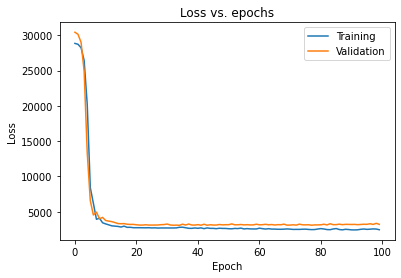

In [54]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [55]:
def get_regularized_model(input_shape,wd,drate):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dropout(drate),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(units=1) # by default
    ])
    return model

In [56]:
model = get_regularized_model(X_train[0].shape,1e-5,0.3)

In [57]:
def compile_model_reg(model):
        model.compile(optimizer='adam',loss='mse',metrics=['mape'])

In [58]:
compile_model_reg(model)

In [59]:
history=model.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.15, verbose=0)

In [60]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 5ms/step - loss: 3361.2075 - mape: 45.0782
[3361.20751953125, 45.078224182128906]


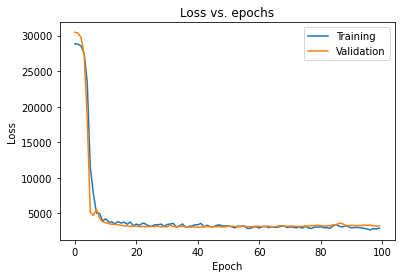

In [61]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Early Stopping Callback

https://keras.io/api/callbacks/early_stopping/

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

Callbacks provide a way to execute code and interact with the training model process automatically.

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The EarlyStopping callback is configured when instantiated via arguments.


* The “monitor” allows you to specify the performance measure to monitor in order to end training. Recall from the previous section that the calculation of measures on the validation dataset will have the ‘val_‘ prefix, such as ‘val_loss‘ for the loss on the validation dataset.
`es = EarlyStopping(monitor='val_loss')`

* Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

* For example, we would seek a minimum for validation loss and a minimum for validation mean squared error, whereas we would seek a maximum for validation accuracy.
`es = EarlyStopping(monitor='val_loss', mode='min')`

* By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.

* That is all that is needed for the simplest form of early stopping. Training will stop when the chosen performance measure stops improving. To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.
`es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)`

* Often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.

* We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

* `es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)`

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
def get_regularized_model2(input_shape, wd, rate):
    model=Sequential([InputLayer(input_shape=input_shape),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dense(1)     
    ])
    return model

In [64]:
model = get_regularized_model2(X_train[0].shape,1e-6,0.3)

In [65]:
compile_model_reg(model)

In [66]:
history=model.fit(X_train,y_train,batch_size=32, epochs=1000, validation_split=0.15, verbose=0, callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

In [67]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 7ms/step - loss: 3523.0979 - mape: 44.4849
[3523.097900390625, 44.48490524291992]


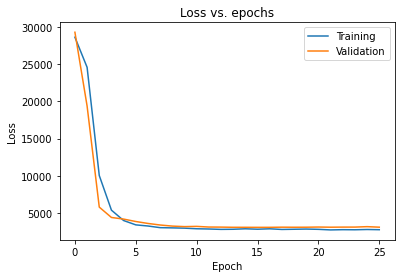

In [68]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Custom Callback

In [69]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class MyTrainCallback(Callback):
    def on_train_begin(self,logs=None):
        print('Starting training')
    def on_train_batch_begin(self,batch,logs=None):
        print(f"Training: Starting batch {batch}")
    def on_epoch_begin(self,epoch,logs=None):
        print(f"Training: Starting epoch {epoch}")

In [71]:
model = get_regularized_model2(X_train[0].shape,1e-6,0.3)

In [72]:
compile_model_reg(model)

In [73]:
history=model.fit(X_train,y_train,batch_size=32, epochs=1000, validation_split=0.15, verbose=0, callbacks=[EarlyStopping(monitor='val_loss',patience=5),MyTrainCallback()])

Starting training
Training: Starting epoch 0
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting batch 7
Training: Starting batch 8
Training: Starting batch 9
Training: Starting batch 10
Training: Starting epoch 1
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting batch 7
Training: Starting batch 8
Training: Starting batch 9
Training: Starting batch 10
Training: Starting epoch 2
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting batch 7
Training: Starting batch 8
Training: Starting batch 9
Training: Starting batch 10
Trainin

In [74]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 5ms/step - loss: 3574.3562 - mape: 43.5106
[3574.356201171875, 43.5106086730957]


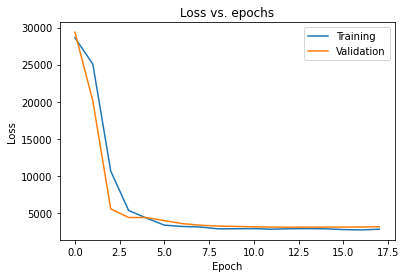

In [75]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Checkpointing in Keras

The EarlyStopping callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.

An additional callback is required that will save the best model observed during training for later use. This is the ModelCheckpoint callback.

The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it only to save the best model observed during training as defined by a chosen performance measure on the validation dataset.

Saving and loading models requires that HDF5 support has been installed on your workstation. For example, using the pip Python installer, this can be achieved as follows:

#### Hierarchical Data Formats - What is HDF5

Hierarchical Structure - A file directory within a file

The HDF5 format can be thought of as a file system contained and described within one single file. Think about the files and folders stored on your computer. You might have a data directory with some temperature data for multiple field sites. These temperature data are collected every minute and summarized on an hourly, daily and weekly basis. Within one HDF5 file, you can store a similar set of data organized in the same way that you might organize files and folders on your computer. However in a HDF5 file, what we call "directories" or "folders" on our computers, are called groups and what we call files on our computer are called datasets.

http://web.mit.edu/fwtools_v3.1.0/www/H5.intro.html
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter11.05-HDF5-Files.html

In [76]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [77]:
checkpoint=ModelCheckpoint('my_keras_model.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1,
                          monitor='accuracy')

In [78]:
# Save the model in .h5 format
my_checkpoint=ModelCheckpoint('my_keras_model.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1)


In [79]:
history=model.fit(X_train,y_train,batch_size=32, epochs=1000, validation_split=0.15, verbose=0, callbacks=[EarlyStopping(monitor='val_loss',patience=5),MyTrainCallback(),my_checkpoint])

Starting training
Training: Starting epoch 0
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting batch 7
Training: Starting batch 8
Training: Starting batch 9
Training: Starting batch 10

Epoch 00001: saving model to my_keras_model.h5
Training: Starting epoch 1
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting batch 7
Training: Starting batch 8
Training: Starting batch 9
Training: Starting batch 10

Epoch 00002: saving model to my_keras_model.h5
Training: Starting epoch 2
Training: Starting batch 0
Training: Starting batch 1
Training: Starting batch 2
Training: Starting batch 3
Training: Starting batch 4
Training: Starting batch 5
Training: Starting batch 6
Training: Starting b

In [81]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 5ms/step - loss: 3518.6606 - mape: 44.4515
[3518.66064453125, 44.451454162597656]


In [82]:
!ls

TensorFlow_for_regression_problem_Callbacks.ipynb  imgs  my_keras_model.h5


# Loading models

In [83]:
from tensorflow.keras.models import load_model

In [84]:
model=load_model('my_keras_model.h5')

In [85]:
scores=model.evaluate(X_test,y_test)
print(scores)

2/2 [==============================] - 0s 5ms/step - loss: 3518.6606 - mape: 44.4515
[3518.66064453125, 44.451454162597656]
